In [2]:
import re
import string
import pandas as pd
import numpy as np

In [3]:
def clean_digit_punct(sentences):
    def clean_text(text):
        cleaned_text = ''
        words = re.findall(r'\b\w+\b', text)
        if words and not words[0].isdigit():
            cleaned_text = ' '.join(words)
        else:
            cleaned_text = ' '.join(words[1:])

        return cleaned_text

    cleaned_sentences = []

    if type(sentences) == str:
        cleaned_sentences = clean_text(sentences)
    else:
        try:
            for sentence in sentences:
                tmp_text = clean_text(sentence)
                cleaned_sentences.append(tmp_text) 

        except TypeError:
            cleaned_sentences = np.nan
        
    return cleaned_sentences


# function to remove "(number)" from the start of the sentence
def remove_article_number(text):
    if text:
        return re.sub(r'^\(\d+\)\s*', '', text)
    else:
        return text
    

def remove_startend_punct(text):
    punctuations = string.punctuation
    
    if text[0] in punctuations:
        text = text[1:]
    elif text[-1] in punctuations:
        text = text[:-1]
    else:
        text = text
        
    return text

def list_of_text_clean(list_of_text):
    cleaned_text = []

    # check if the input is not a empty list
    if len(list_of_text) > 0:
        for text in list_of_text:
            cleaned_text.append(remove_article_number(text))
    else:
        cleaned_text = list_of_text
        
    return cleaned_text

In [4]:
data = pd.read_csv('../../data/law_analyzer_new4_keywords.csv')
data

,nomor_peraturan,judul,tahun,no,definisi,heading
0,221/PMK.010/2015,Pengenaan Bea Masuk Anti Dumping Terhadap Impo...,2015,221,NaN,NaN
1,PP 21 TAHUN 2005,Ahli Teknologi Kekayaan Intelektual Serta Hasi...,2005,21,"['Standar nasional pendidikan', 'Pendidikan fo...","['KETENTUAN UMUM', 'LINGKUP, FUNGSI, DAN TUJUA..."
2,PP 51 TAHUN 2008,Pajak Penghasilan atas Penghasilan Dari Usaha ...,2008,51,NaN,NaN
3,62/PMK.04/2018,Perubahan Kedua atas Peraturan Menteri Keuanga...,2018,62,NaN,NaN
4,42/PMK.05/2017,Perubahan atas Peraturan Menteri Keuangan Nomo...,2017,42,NaN,NaN
...,...,...,...,...,...,...
3014,PP 9 TAHUN 2014,Pelaksanaan Undang-Undang Nomor 4 Tahun 2011 t...,2014,9,"['Geospasial', 'Data Geospasial', 'Informasi G...","['KETENTUAN UMUM', 'PENYELENGGARAAN INFORMASI ..."
3015,PP 25 TAHUN 2017,Pemberian Tunjangan Hari Raya dalam Tahun Angg...,2017,25,"['Pegawai Negeri Sipil', 'Prajurit Tentara Nas...",NaN
3016,160/PMK.04/2010,Nilai Pabean untuk Penghitungan Bea Masuk.,2010,160,NaN,NaN
3017,146/PMK.05/2019,Tarif Layanan Badan Layanan Umum Politeknik Ke...,2019,146,NaN,NaN


In [5]:
# delete records with if definisi or heading is empty
data = data.dropna(subset=['heading', 'definisi'], how='all').reset_index(drop=True)
data

,nomor_peraturan,judul,tahun,no,definisi,heading
0,PP 21 TAHUN 2005,Ahli Teknologi Kekayaan Intelektual Serta Hasi...,2005,21,"['Standar nasional pendidikan', 'Pendidikan fo...","['KETENTUAN UMUM', 'LINGKUP, FUNGSI, DAN TUJUA..."
1,47/PMK.05/2017,Pelaksanaan Likuidasi Entitas Akuntansi pada B...,2017,47,"['Bagian Anggaran Bendahara Umum Negara', 'Lik...","['KETENTUAN UMUM', 'RUANG LINGKUP', 'KRITERIA ..."
2,115/PMK.07/2013,Tata Cara Pemungutan dan Penyetoran Pajak Rokok.,2013,115,"['Pajak Rokok', 'Rokok', 'Cukai Rokok', 'Surat...","['KETENTUAN UMUM', 'TATA CARA PEMUNGUTAN PAJAK..."
3,UU 11 TAHUN 1992,Dana Pensiun,1992,11,"['Dana Pensiun', 'Dana Pensiun Pemberi Kerja',...","['KETENTUAN UMUM', 'JENIS DAN STATUS HUKUM DAN..."
4,59/PMK.04/2017,Tidak Dipungut Cukai.,2017,59,"['Undang-Undang Kepabeanan', 'Undang-Undang Cu...","['KETENTUAN UMUM', 'Tidak Dipungut Cukai atas ..."
...,...,...,...,...,...,...
2223,26/PMK.05/2014,Tarif Layanan Badan Layanan Umum Politeknik Ke...,2014,26,['Tarif Layanan Badan Layanan Umum Politeknik ...,NaN
2224,67/PMK.05/2019,Tarif Layanan Badan Layanan Umum Rumah Sakit B...,2019,67,['(1) Tarif Layanan Badan Layanan Umum Rumah S...,NaN
2225,PP 9 TAHUN 2014,Pelaksanaan Undang-Undang Nomor 4 Tahun 2011 t...,2014,9,"['Geospasial', 'Data Geospasial', 'Informasi G...","['KETENTUAN UMUM', 'PENYELENGGARAAN INFORMASI ..."
2226,PP 25 TAHUN 2017,Pemberian Tunjangan Hari Raya dalam Tahun Angg...,2017,25,"['Pegawai Negeri Sipil', 'Prajurit Tentara Nas...",NaN


In [6]:
data.loc[:, 'definisi'] = data['definisi'].apply(lambda x: eval(x) if pd.notnull(x) else '[]')
data.loc[:, 'heading'] = data['heading'].apply(lambda x: eval(x) if pd.notnull(x) else '[]')

data.loc[:, 'definisi'] = data['definisi'].apply(lambda x: eval(x) if type(x) == str else x)
data.loc[:, 'heading'] = data['heading'].apply(lambda x: eval(x) if type(x) == str else x)

data

,nomor_peraturan,judul,tahun,no,definisi,heading
0,PP 21 TAHUN 2005,Ahli Teknologi Kekayaan Intelektual Serta Hasi...,2005,21,"[Standar nasional pendidikan, Pendidikan forma...","[KETENTUAN UMUM, LINGKUP, FUNGSI, DAN TUJUAN, ..."
1,47/PMK.05/2017,Pelaksanaan Likuidasi Entitas Akuntansi pada B...,2017,47,"[Bagian Anggaran Bendahara Umum Negara, Likuid...","[KETENTUAN UMUM, RUANG LINGKUP, KRITERIA LIKUI..."
2,115/PMK.07/2013,Tata Cara Pemungutan dan Penyetoran Pajak Rokok.,2013,115,"[Pajak Rokok, Rokok, Cukai Rokok, Surat Pember...","[KETENTUAN UMUM, TATA CARA PEMUNGUTAN PAJAK RO..."
3,UU 11 TAHUN 1992,Dana Pensiun,1992,11,"[Dana Pensiun, Dana Pensiun Pemberi Kerja, Dan...","[KETENTUAN UMUM, JENIS DAN STATUS HUKUM DANA P..."
4,59/PMK.04/2017,Tidak Dipungut Cukai.,2017,59,"[Undang-Undang Kepabeanan, Undang-Undang Cukai...","[KETENTUAN UMUM, Tidak Dipungut Cukai atas Tem..."
...,...,...,...,...,...,...
2223,26/PMK.05/2014,Tarif Layanan Badan Layanan Umum Politeknik Ke...,2014,26,[Tarif Layanan Badan Layanan Umum Politeknik K...,[]
2224,67/PMK.05/2019,Tarif Layanan Badan Layanan Umum Rumah Sakit B...,2019,67,[(1) Tarif Layanan Badan Layanan Umum Rumah Sa...,[]
2225,PP 9 TAHUN 2014,Pelaksanaan Undang-Undang Nomor 4 Tahun 2011 t...,2014,9,"[Geospasial, Data Geospasial, Informasi Geospa...","[KETENTUAN UMUM, PENYELENGGARAAN INFORMASI GEO..."
2226,PP 25 TAHUN 2017,Pemberian Tunjangan Hari Raya dalam Tahun Angg...,2017,25,"[Pegawai Negeri Sipil, Prajurit Tentara Nasion...",[]


In [7]:
data['heading'] = data['heading'].apply(lambda x: list_of_text_clean(x))
data['definisi'] = data['definisi'].apply(lambda x: list_of_text_clean(x))

data['judul'] = data['judul'].apply(lambda x: remove_startend_punct(x))

data

,nomor_peraturan,judul,tahun,no,definisi,heading
0,PP 21 TAHUN 2005,Ahli Teknologi Kekayaan Intelektual Serta Hasi...,2005,21,"[Standar nasional pendidikan, Pendidikan forma...","[KETENTUAN UMUM, LINGKUP, FUNGSI, DAN TUJUAN, ..."
1,47/PMK.05/2017,Pelaksanaan Likuidasi Entitas Akuntansi pada B...,2017,47,"[Bagian Anggaran Bendahara Umum Negara, Likuid...","[KETENTUAN UMUM, RUANG LINGKUP, KRITERIA LIKUI..."
2,115/PMK.07/2013,Tata Cara Pemungutan dan Penyetoran Pajak Rokok,2013,115,"[Pajak Rokok, Rokok, Cukai Rokok, Surat Pember...","[KETENTUAN UMUM, TATA CARA PEMUNGUTAN PAJAK RO..."
3,UU 11 TAHUN 1992,Dana Pensiun,1992,11,"[Dana Pensiun, Dana Pensiun Pemberi Kerja, Dan...","[KETENTUAN UMUM, JENIS DAN STATUS HUKUM DANA P..."
4,59/PMK.04/2017,Tidak Dipungut Cukai,2017,59,"[Undang-Undang Kepabeanan, Undang-Undang Cukai...","[KETENTUAN UMUM, Tidak Dipungut Cukai atas Tem..."
...,...,...,...,...,...,...
2223,26/PMK.05/2014,Tarif Layanan Badan Layanan Umum Politeknik Ke...,2014,26,[Tarif Layanan Badan Layanan Umum Politeknik K...,[]
2224,67/PMK.05/2019,Tarif Layanan Badan Layanan Umum Rumah Sakit B...,2019,67,[Tarif Layanan Badan Layanan Umum Rumah Sakit ...,[]
2225,PP 9 TAHUN 2014,Pelaksanaan Undang-Undang Nomor 4 Tahun 2011 t...,2014,9,"[Geospasial, Data Geospasial, Informasi Geospa...","[KETENTUAN UMUM, PENYELENGGARAAN INFORMASI GEO..."
2226,PP 25 TAHUN 2017,Pemberian Tunjangan Hari Raya dalam Tahun Angg...,2017,25,"[Pegawai Negeri Sipil, Prajurit Tentara Nasion...",[]


# Data Exploration

In [8]:
# combine all definisi into one list and count the frequency of each definisi
all_definisi = []
all_heading = []
all_def_index = []
all_head_index = []

for i, definisi in enumerate(data['definisi']):
    for text in definisi:
        if text != '':
            all_def_index.append(i)
            all_definisi.append(text)
            
for i, heading in enumerate(data['heading']):
    for text in heading:
        if text != '':
            all_head_index.append(i)
            all_heading.append(text)

print('jumlah definisi:',len(all_definisi))
print('jumlah heading:',len(all_heading))

jumlah definisi: 15943
jumlah heading: 13370


In [9]:
definisi_freq = pd.Series(all_definisi).value_counts()
heading_freq = pd.Series(all_heading).value_counts()

In [10]:
definisi_freq

Menteri                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      300
Direktur Jenderal                                                                                                                                                                                                                                                                                                                                                                                                                                                                            118
Pemerintah Daerah                     

In [11]:
heading_freq

KETENTUAN PENUTUP                                                                                            824
KETENTUAN UMUM                                                                                               812
KETENTUAN PERALIHAN                                                                                          475
KETENTUAN LAIN-LAIN                                                                                          277
Umum                                                                                                         137
                                                                                                            ... 
RENCANA PENARIKAN DANA DAN RENCANA PENERIMAAN DANA KEMENTERIAN/LEMBAGA                                         1
Tanggung Jawab Penyusunan RPD, Rencana Penerimaan Dana, dan Perencanaan Kas                                    1
Tujuan Penyusunan RPD, Rencana Penerimaan Dana, dan Perencanaan Kas                             

In [12]:
# get unique value of all heading & all definisi
#unique_definisi = set(all_definisi)
#unique_heading = set(all_heading)

# export unique heading & definisi into txt file
#with open('../../data/unique_definisi_after.txt', 'w') as f:
#    for definisi in unique_definisi:
#        f.write(definisi + '\n')
        
#with open('../../data/unique_heading_after.txt', 'w') as f:
#    for heading in unique_heading:
#        f.write(heading + '\n')

In [13]:
# create dataframe of all_definisi with its length and index from main dataframe (data)
definisi_length = pd.Series([len(text) for text in all_definisi])
definisi_df = pd.DataFrame({'definisi': all_definisi, 'length': definisi_length, 'data_index': all_def_index})
#definisi_df

# get definisi_df with length in necessary range
definisi_df[definisi_df['length'] > 300]

,definisi,length,data_index
347,Mengesahkan Persetujuan antara Pemerintah Repu...,543,27
450,Di antara Pasal 3 dan Pasal 4 disisipkan 1 (sa...,488,39
451,Wajib Pajak yang bergerak dalam bidang usaha t...,1429,40
475,Atas impor dan/atau penyerahan buku-buku pelaj...,1462,43
477,Menetapkan tarif bea masuk atas barang impor d...,321,45
...,...,...,...
14789,MengesahkanPersetujuanPerdaganganantaraPemerin...,374,2070
15211,MengesahkanPerjanjianPerdaganganPreferensialan...,422,2122
15312,Jenis Penerimaan Negara Bukan Pajak yang berla...,908,2141
15412,Mengesahkan Persetujuan antara Pemerintah Repu...,588,2164


In [14]:
# create dataframe of all_heading with its length and index from main dataframe (data)
heading_length = pd.Series([len(text) for text in all_heading])
heading_df = pd.DataFrame({'heading': all_heading, 'length': heading_length, 'data_index': all_head_index})
#heading_df

# get heading_df with length in necessary range
heading_df[heading_df['length'] > 260]

,heading,length,data_index
495,PENETAPAN PENYELESAIAN STATUS KEPEMILIKAN Pasa...,631,75
625,Pejabat yang Berwenang Menghukum Pasal 15 (1) ...,1098,91
980,. . . ditjen Peraturan Perundang-undangan Bagi...,2387,141
981,. . . ditjen Peraturan Perundang-undangan Bagi...,1153,141
982,. . . ditjen Peraturan Perundang-undangan Bagi...,1012,141
...,...,...,...
13316,Umum Pasal 22 (1) IUP sebagaimana dimaksud dal...,3986,2212
13317,Umum Pasal 47 (1) IPR diberikan oleh bupati/wa...,340,2212
13319,Umum Pasal 51 (1) Pemberian WIUPK sebagaimana ...,1934,2212
13320,Umum Pasal 62 (1) IUPK diberikan oleh Menteri ...,2011,2212


In [15]:
# filter & remove value in definisi & heading
data['definisi'] = data['definisi'].apply(lambda x: [text for text in x if len(text) <= 360])
data['heading'] = data['heading'].apply(lambda x: [text for text in x if len(text) <= 260])
data

,nomor_peraturan,judul,tahun,no,definisi,heading
0,PP 21 TAHUN 2005,Ahli Teknologi Kekayaan Intelektual Serta Hasi...,2005,21,"[Standar nasional pendidikan, Pendidikan forma...","[KETENTUAN UMUM, LINGKUP, FUNGSI, DAN TUJUAN, ..."
1,47/PMK.05/2017,Pelaksanaan Likuidasi Entitas Akuntansi pada B...,2017,47,"[Bagian Anggaran Bendahara Umum Negara, Likuid...","[KETENTUAN UMUM, RUANG LINGKUP, KRITERIA LIKUI..."
2,115/PMK.07/2013,Tata Cara Pemungutan dan Penyetoran Pajak Rokok,2013,115,"[Pajak Rokok, Rokok, Cukai Rokok, Surat Pember...","[KETENTUAN UMUM, TATA CARA PEMUNGUTAN PAJAK RO..."
3,UU 11 TAHUN 1992,Dana Pensiun,1992,11,"[Dana Pensiun, Dana Pensiun Pemberi Kerja, Dan...","[KETENTUAN UMUM, JENIS DAN STATUS HUKUM DANA P..."
4,59/PMK.04/2017,Tidak Dipungut Cukai,2017,59,"[Undang-Undang Kepabeanan, Undang-Undang Cukai...","[KETENTUAN UMUM, Tidak Dipungut Cukai atas Tem..."
...,...,...,...,...,...,...
2223,26/PMK.05/2014,Tarif Layanan Badan Layanan Umum Politeknik Ke...,2014,26,[Tarif Layanan Badan Layanan Umum Politeknik K...,[]
2224,67/PMK.05/2019,Tarif Layanan Badan Layanan Umum Rumah Sakit B...,2019,67,[Tarif Layanan Badan Layanan Umum Rumah Sakit ...,[]
2225,PP 9 TAHUN 2014,Pelaksanaan Undang-Undang Nomor 4 Tahun 2011 t...,2014,9,"[Geospasial, Data Geospasial, Informasi Geospa...","[KETENTUAN UMUM, PENYELENGGARAAN INFORMASI GEO..."
2226,PP 25 TAHUN 2017,Pemberian Tunjangan Hari Raya dalam Tahun Angg...,2017,25,"[Pegawai Negeri Sipil, Prajurit Tentara Nasion...",[]


In [16]:
# combine sentence in definisi and heading column into one sentence into new column called 'keyword'
data['keywords'] = data['definisi'] + data['heading']
data

,nomor_peraturan,judul,tahun,no,definisi,heading,keywords
0,PP 21 TAHUN 2005,Ahli Teknologi Kekayaan Intelektual Serta Hasi...,2005,21,"[Standar nasional pendidikan, Pendidikan forma...","[KETENTUAN UMUM, LINGKUP, FUNGSI, DAN TUJUAN, ...","[Standar nasional pendidikan, Pendidikan forma..."
1,47/PMK.05/2017,Pelaksanaan Likuidasi Entitas Akuntansi pada B...,2017,47,"[Bagian Anggaran Bendahara Umum Negara, Likuid...","[KETENTUAN UMUM, RUANG LINGKUP, KRITERIA LIKUI...","[Bagian Anggaran Bendahara Umum Negara, Likuid..."
2,115/PMK.07/2013,Tata Cara Pemungutan dan Penyetoran Pajak Rokok,2013,115,"[Pajak Rokok, Rokok, Cukai Rokok, Surat Pember...","[KETENTUAN UMUM, TATA CARA PEMUNGUTAN PAJAK RO...","[Pajak Rokok, Rokok, Cukai Rokok, Surat Pember..."
3,UU 11 TAHUN 1992,Dana Pensiun,1992,11,"[Dana Pensiun, Dana Pensiun Pemberi Kerja, Dan...","[KETENTUAN UMUM, JENIS DAN STATUS HUKUM DANA P...","[Dana Pensiun, Dana Pensiun Pemberi Kerja, Dan..."
4,59/PMK.04/2017,Tidak Dipungut Cukai,2017,59,"[Undang-Undang Kepabeanan, Undang-Undang Cukai...","[KETENTUAN UMUM, Tidak Dipungut Cukai atas Tem...","[Undang-Undang Kepabeanan, Undang-Undang Cukai..."
...,...,...,...,...,...,...,...
2223,26/PMK.05/2014,Tarif Layanan Badan Layanan Umum Politeknik Ke...,2014,26,[Tarif Layanan Badan Layanan Umum Politeknik K...,[],[Tarif Layanan Badan Layanan Umum Politeknik K...
2224,67/PMK.05/2019,Tarif Layanan Badan Layanan Umum Rumah Sakit B...,2019,67,[Tarif Layanan Badan Layanan Umum Rumah Sakit ...,[],[Tarif Layanan Badan Layanan Umum Rumah Sakit ...
2225,PP 9 TAHUN 2014,Pelaksanaan Undang-Undang Nomor 4 Tahun 2011 t...,2014,9,"[Geospasial, Data Geospasial, Informasi Geospa...","[KETENTUAN UMUM, PENYELENGGARAAN INFORMASI GEO...","[Geospasial, Data Geospasial, Informasi Geospa..."
2226,PP 25 TAHUN 2017,Pemberian Tunjangan Hari Raya dalam Tahun Angg...,2017,25,"[Pegawai Negeri Sipil, Prajurit Tentara Nasion...",[],"[Pegawai Negeri Sipil, Prajurit Tentara Nasion..."


In [17]:
# combine all keywords into one list and count the frequency of each keyword
all_keywords = []

for i, keywords in enumerate(data['keywords']):
    for keyword in keywords:
        if keyword != '':
            all_keywords.append(keyword)

keywords_freq = pd.Series(all_keywords).value_counts()
keywords_freq

KETENTUAN PENUTUP                                             824
KETENTUAN UMUM                                                812
KETENTUAN PERALIHAN                                           475
Menteri                                                       301
KETENTUAN LAIN-LAIN                                           277
                                                             ... 
Sumpah, Kode etik dan Peraturan Disiplin                        1
Kesejahteraan                                                   1
Surat Pernyataan Ketertarikan                                   1
_Request for Interest_ yang selanjutnya disingk _at_RFI __      1
DIREKTUR PENGELOLAAN ASET PIUTANG                               1
Name: count, Length: 14873, dtype: int64

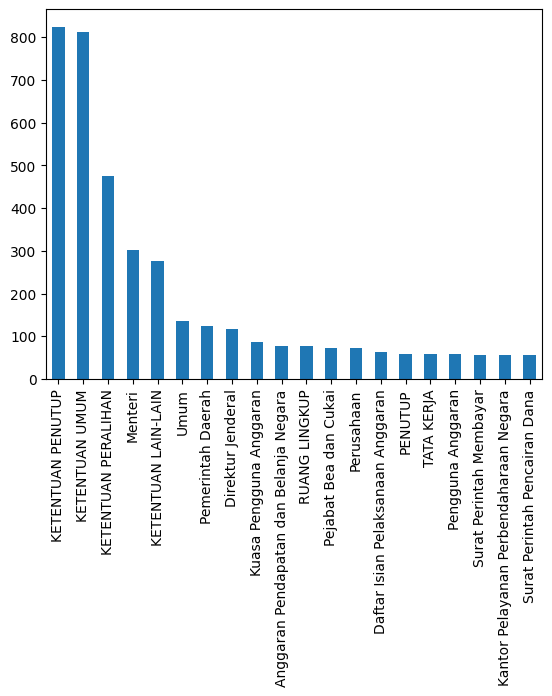

In [19]:
# plot the frequency of each keyword (only top 20)
import matplotlib.pyplot as plt

keywords_freq[:20].plot(kind='bar')
plt.show()

In [20]:
# save the data into csv file
data.to_csv('../../data/law_analyzer_new4_keywords_cleaned.csv', index=False)